## EDA

In [182]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd

In [146]:
# Importa los datasets de score, titles y all
score = pd.read_parquet('processed_data/score.parquet')
titles = pd.read_parquet('processed_data/titles.parquet')
S = pd.read_parquet('processed_data/S.parquet')
all = pd.read_parquet('processed_data/all.parquet')

In [152]:
print(score.shape)
score.describe(exclude='number')

(11024289, 4)


,movieId,platform
count,11024289,11024289
unique,22998,4
top,as4197,amazon
freq,576,4631850


In [171]:
N_scores = score['movieId'].count()         # 11024289 puntuaciones
N_titles_id = score['movieId'].nunique()    # 22998 id de titulos en score
most_scored_id = score['movieId'].mode()    # as4197 id de titulo mas puntuado
most_scored_p = score['platform'].mode()    # amazon es la plataforma con mas titulos puntuados

In [155]:
titles.describe()

,release_year,duration_int
count,22998.000000,22998.000000
mean,2010.811244,65.710584
std,15.401142,51.760868
min,1920.000000,0.000000
25%,2010.000000,3.000000
50%,2016.000000,83.000000
75%,2019.000000,101.000000
max,2021.000000,601.000000


In [153]:
print(titles.shape)
titles.describe(exclude='number') # No coinciden los encabezados de ambos datasets para movieId e id

(22998, 13)


,id,platform,type,title,director,cast,country,date_added,duration_type,listed_in,description
count,22998,22998,22998,22998,22998,22998,22998,13444,22516,22998,22998
unique,22998,4,2,22042,10096,16745,887,2003,2,1687,22670
top,as1,amazon,movie,married at first sight,nan,nan,nan,2019-11-12 00:00:00,min,drama,1
freq,1,9668,16481,4,8259,5321,11499,724,15999,1061,15
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-07-14 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-26 00:00:00,NaN,NaN,NaN


In [172]:
min_year_t = titles['release_year'].min()   # 1920 es el anio de lanzamiento mas antiguo
max_year_t = titles['release_year'].min()   # 2021 es el anio de lanzamiento mas reciente

Text(0, 0.5, 'Ratio of missing values')

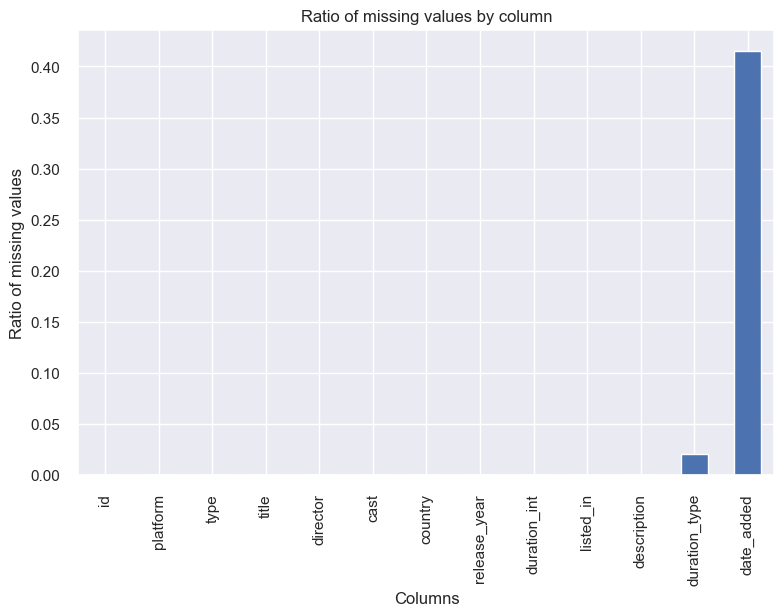

In [192]:
# Visualiza valores faltantes en porcentajes por columna
titles.isna().mean().sort_values().plot(kind='bar')
plt.title('Ratio of missing values by column')
plt.xlabel('Columns')
plt.ylabel('Ratio of missing values')

<Figure size 400x400 with 0 Axes>

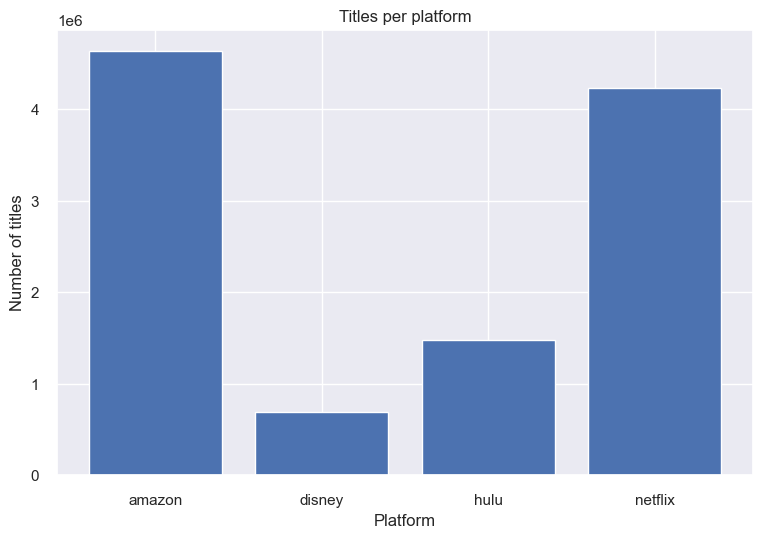

In [187]:
# Peliculas por plataforma
moviesByP = score.groupby('platform').agg(pd.Series({'movieId': 'count'}))

fig = plt.figure(figsize=(4,4))
fig, ax = plt.subplots()
plt.bar(moviesByP.index, moviesByP['movieId'].values)
ax.set_xlabel('Platform')
ax.set_ylabel('Number of titles')
ax.set_title('Titles per platform')
plt.show()

In [147]:
# Score agrupado por pelicula (min = 3.3, max = 3.72)
scoreByP = all.groupby(by=['movieId','platform']).mean()
maxAvgScore = scoreByP['score'].max()
minAvgScore = scoreByP['score'].min()
scoreByP.head(2)

,,userId,score
movieId,platform,,
as1,amazon,99178.623506,3.467131
as10,amazon,92915.883041,3.439571


In [148]:
# Usuarios únicos 115077
print('users:',len(score['userId'].unique()))
usersAmount = len(score['userId'].unique())
# Calificaciones de películas por usuario
scoresByUser = score.groupby(['userId']).count()
scoresByUser.tail()

users: 115077


,movieId,score,platform
userId,,,
270892,75,75,75
270893,190,190,190
270894,148,148,148
270895,20,20,20
270896,260,260,260


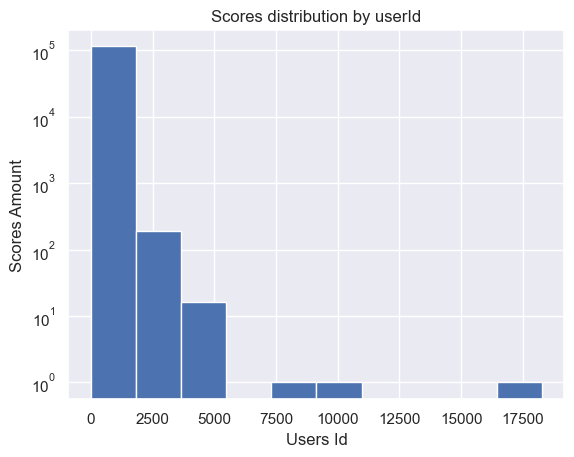

In [54]:
# Distribucion de calificaciones por usuario
plt.hist(scoresByUser.score, log= True)
plt.title('Scores distribution by userId')  
plt.ylabel("Scores Amount")      # Adjust the label of the y-axis
plt.xlabel("Users Id")              # # Adjust the label of the x-axis
plt.show()

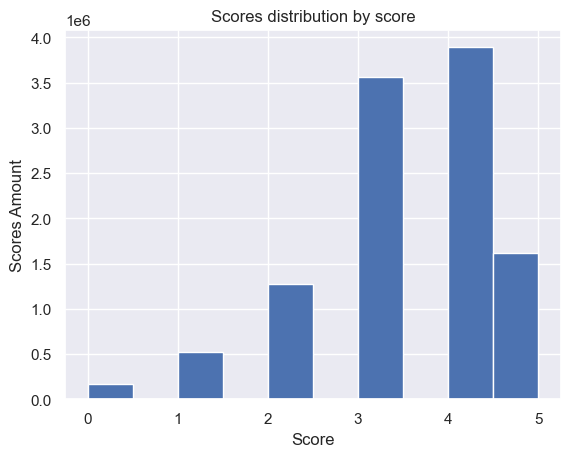

In [55]:
# Distribución de las cantidades de calificaciones
score['score'].hist()
plt.title('Scores distribution by score')
plt.ylabel("Scores Amount")      # Adjust the label of the y-axis
plt.xlabel("Score")              # Adjust the label of the x-axis
plt.show()

In [56]:
# Calificaciones por pelicula
print('movies:',len(score['movieId'].unique()))     # Cantidad de peliculas/series: 22998
scoresByMovie = score.groupby(['movieId']).count()  # Agrupar por peliculas/series  
maxAmountScores = scoresByMovie['score'].max()      # Agrupacion maxima: 576
scoresByMovie.head(2)

movies: 22998


,userId,score,platform
movieId,,,
as1,502,502,502
as10,513,513,513


In [58]:
# Peliculas/series con mas y menos calificaciones
idx_max = scoresByMovie['userId'].idxmax()                  # Index de maxima cantidad de scores (576): as4197
print('movieId with maximum amount of scores:',idx_max) 
maxAmountScores = scoresByMovie['score'].max()              # Maxima cantidad de scores: 576
movieIdMaxAmountScores = idx_max                            # movieId con maxima cantidad de scores: as4197
idx_min = scoresByMovie['userId'].idxmin()                  # Index de minimo Id de usuario (396): as4940
print('movieId with minimum amount of scores:',idx_min)
minAmountScores = scoresByMovie['score'].min()              # Minima cantidad de scores: 396
movieIdMinAmountScores = idx_min                            # movieId con minima cantidad de scores: as4940

movieId with maximum amount of scores: as4197
movieId with minimum amount of scores: as4940


In [149]:
# Viewed: Peliculas/series ordenadas por mas a menos cantidad de calificaciones
Viewed = all.groupby(['movieId']).count()
Viewed.sort_values('userId', ascending = False, inplace = True)
Viewed['viewed'] = Viewed['userId']
Viewed.drop(columns = ['userId','score','platform','title'], inplace = True)
Viewed.head(3)

,viewed
movieId,
as4197,576
as9065,560
ns7279,558
as848,558
hs2360,556


In [150]:
# Agrega los title al Viewed
titles = titles.set_index('movieId')
Viewed['title'] = titles.loc[Viewed.index].title
Viewed

KeyError: "None of ['movieId'] are in the columns"

In [61]:
movieMaxAmountScores = Viewed.loc[movieIdMaxAmountScores, 'title'] 
movieMinAmountScores = Viewed.loc[movieIdMinAmountScores, 'title'] 
print('Movie with Maximum amount of scores:',movieMaxAmountScores)
print('Movie with Minimum amount of scores:',movieMinAmountScores)

Movie with Maximum amount of scores: from other worlds
Movie with Minimum amount of scores: mitzi (nbc 1968)


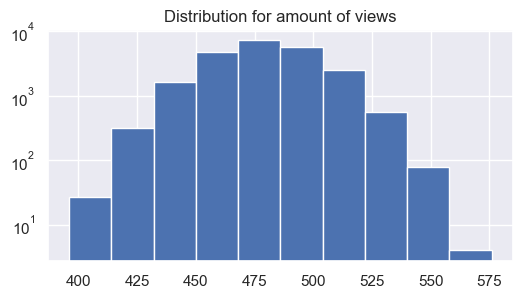

In [62]:
# Grafica la cantidad de vistas
plt.figure(figsize = (6,3))
Viewed.viewed[Viewed.viewed<600].hist(log = True)
plt.title('Distribution for amount of views')
plt.show()

## Conclusiones

In [ ]:
# df_title.to_csv('data/df_title.csv', index=False)

In [64]:
print('EDA conclusions:')
print('Users amount:',usersAmount)
print('Movies amount:',movies_amount)
print('Scores amount:',scores_amount)
print('Maximum Average Score (by platform)',maxAvgScore)
print('Minimum Average Score (by platform)',minAvgScore)
print('Maximum amount of scores in a movie:', maxAmountScores)
print('Minimum amount of scores in a movie:', minAmountScores)
print('Movie Id with maximum amount of scores:',movieIdMaxAmountScores)
print('Movie Id with minimum amount of scores:',movieIdMinAmountScores)
print('Movie with Maximum amount of scores:',movieMaxAmountScores)
print('Movie with Minimum amount of scores:',movieMinAmountScores)

EDA conclusions:
Users amount: 115077
Scores amount: 11024288
Maximum Average Score (by platform) 3.5866666666666664
Minimum Average Score (by platform) 3.1799163179916317
Maximum amount of scores in a movie: 576
Minimum amount of scores in a movie: 396
Movie Id with maximum amount of scores: as4197
Movie Id with minimum amount of scores: as4940
Movie with Maximum amount of scores: from other worlds
Movie with Minimum amount of scores: mitzi (nbc 1968)
